# Image thresholding
---
Image thresholding is a case of binary segmentation.
Image thresholding assigns black or white to each pixel according to its intensity.
If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value.

The function `cv.threshold` is used to apply the thresholding.

* `retval, dst = cv.threshold(src, thresh, maxval, type[, dst])`
    * Applies a fixed-level threshold to each array element.
    * `thresh`:	threshold value 
    * `maxval`: value assigned to pixel values exceeding the threshold.
    * `type`: OpenCV provides different types of thresholding which is given by the fourth parameter of the function.
    Basic thresholding as described above is done by using the type `cv.THRESH_BINARY`.

In [2]:
import os
import cv2 as cv # OpenCV
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [16, 9]

# %matplotlib qt
# %matplotlib inline

(<AxesSubplot:title={'center':'Mask'}>,
 Text(0.5, 1.0, 'Mask'))

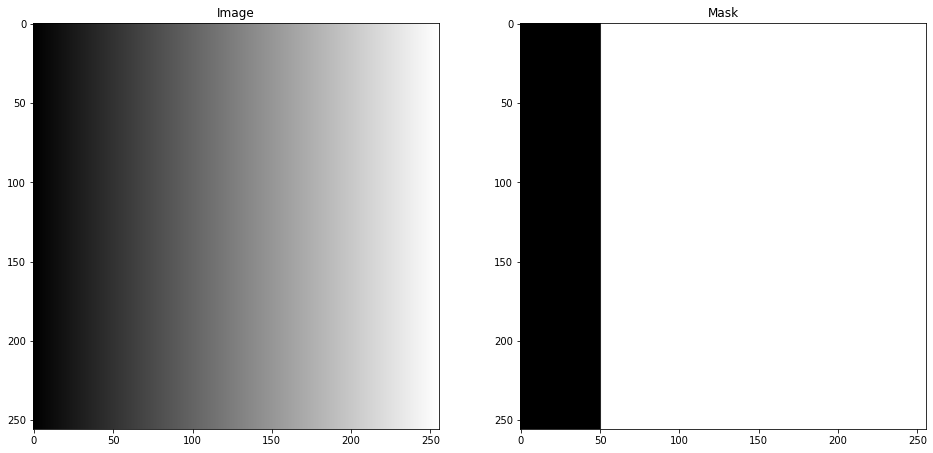

In [14]:
# create gradient image
img = np.arange(0,256,1)
img = np.vstack([img]*256).astype(np.uint8)

# extract mask using thresholding
#ret, mask = cv.threshold(img, 50, 255, cv.THRESH_BINARY)     # 조건: cv.THRESH_BINARY => 50보다 작으면 0, 50보다 크면 255
#ret, mask = cv.threshold(img, 50, 255, cv.THRESH_BINARY_INV) # 조건: cv.THRESH_BINARY => 50보다 작으면 255, 50보다 크면 0
#ret = treshold 값
# or

mask = ((50 < img)).astype(np.uint8) # chage dtype
#print(mask)

# display
plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.title('Image')
plt.subplot(1,2,2),plt.imshow(mask,'gray'), plt.title('Mask')

# Color
---

* Color Spaces
    * Color space coversion
* Color Detection
* Splash of color

## Color spaces

### Changing Color-space

You will learn how to convert images from one color-space to another, like BGR $\leftrightarrow$ Gray, BGR $\leftrightarrow$ HSV etc.

For color conversion, we use the function `cv.cvtColor(input_image, flag)` where flag determines the type of conversion.

* `dst = cv.cvtColor( src, code[, dst[, dstCn]])`
    * Converts an image from a color space to the other.
    * `code`: color space conversion code
        * For BGR $\rightarrow$ Gray conversion we use the flags cv.COLOR_BGR2GRAY.
        * Similarly for BGR $\rightarrow$ HSV, we use the flag cv.COLOR_BGR2HSV.

There are more than 150 color-space conversion methods available in OpenCV.
(https://docs.opencv.org/4.4.0/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0).

But we will look into only two which are most widely used ones, BGR $\leftrightarrow$ Gray, BGR $\leftrightarrow$ HSV.
To get other flags, just run following commands in Python:

In [15]:
flags = [i for i in dir(cv) if i.startswith('IMREAD_')]
print(flags)

['IMREAD_ANYCOLOR', 'IMREAD_ANYDEPTH', 'IMREAD_COLOR', 'IMREAD_GRAYSCALE', 'IMREAD_IGNORE_ORIENTATION', 'IMREAD_LOAD_GDAL', 'IMREAD_REDUCED_COLOR_2', 'IMREAD_REDUCED_COLOR_4', 'IMREAD_REDUCED_COLOR_8', 'IMREAD_REDUCED_GRAYSCALE_2', 'IMREAD_REDUCED_GRAYSCALE_4', 'IMREAD_REDUCED_GRAYSCALE_8', 'IMREAD_UNCHANGED']


In [69]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

### Gray

For BGR $\rightarrow$ Gray conversion we use the flags cv.COLOR_BGR2GRAY.

#### Convert a image to grayscale using OpenCV

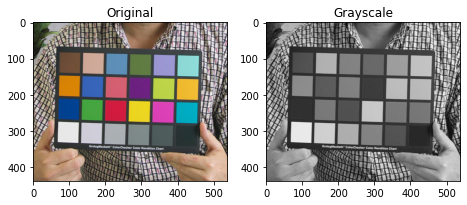

In [23]:
img = cv.imread('resources/Gretag-Macbeth_ColorChecker.jpg')

## TODO
# convert to grayscale using opencv
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
##

# display
plt.subplot(1,4,1), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1,4,2), plt.imshow(gray,'gray'), plt.title('Grayscale')
plt.show()

#### Convert a image to grayscale using Numpy

We can convert a image to grayscale using Numpy.
In OpenCV, images are converted to grayscale from RGB/BGR using:
$\text{RGB[A] to Gray:} \quad Y \leftarrow 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B$.

We can use above equation to convert a image to grayscale with Numpy.

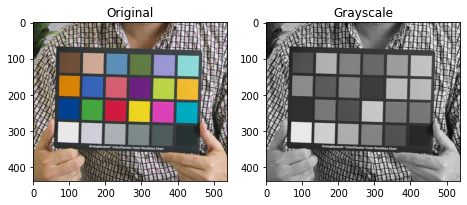

In [58]:
img = cv.imread('resources/Gretag-Macbeth_ColorChecker.jpg')

### convert to grayscale using numpy
## TODO
# split channels
#b,g,r = img[:,:,0], img[:,:,1], img[:,:,2]
b,g,r = cv.split(img)
#b,g,r = np.split(img, 3, axis=2) # h w c

#convert
gray = 0.299*r + 0.587*g + 0.114*b # sum이 1이되면 gray가 나옴, opencv에서는 위의 수치로 해야함
##

# change dtype
gray = np.clip(gray,0,255).astype(np.uint8) # 255넘어가면 잘라버림


# display
plt.subplot(1,4,1), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1,4,2), plt.imshow(gray,'gray'), plt.title('Grayscale')
plt.show()


### RGB

* RGB
    * It is an additive colorspace where colors are obtained by a linear combination of Red, Green, and Blue values.
    * The three channels are correlated by the amount of light hitting the surface.
        * mixing of chrominance ( Color related information ) and luminance ( Intensity related information ) data.

Let us split a image into their R, G and B components and observe them to gain more insight into the color space.

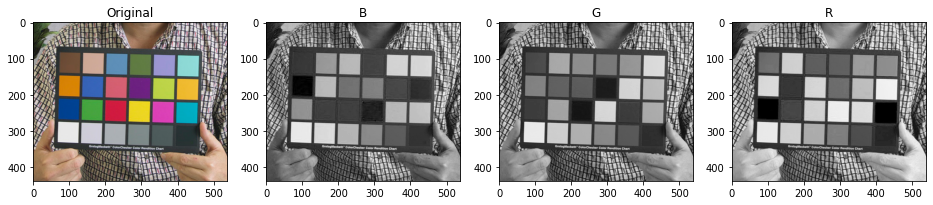

In [56]:
img = cv.imread('resources/Gretag-Macbeth_ColorChecker.jpg')

## TODO: compute RGB
b,g,r = cv.split(img)
##

# display
plt.subplot(1,4,1), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1,4,2), plt.imshow(b,'gray'), plt.title('B') # 파란색이 더밝다 -> 값이 더크다(255에 가까움)
plt.subplot(1,4,3), plt.imshow(g,'gray'), plt.title('G')
plt.subplot(1,4,4), plt.imshow(r,'gray'), plt.title('R')
plt.show()

(439, 538)
(1317, 538)


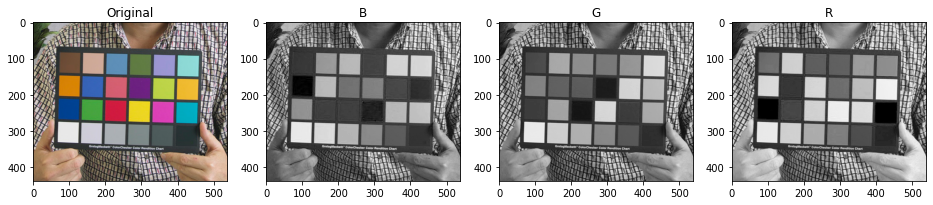

In [77]:
img = cv.imread('resources/Gretag-Macbeth_ColorChecker.jpg')

## TODO: compute RGB
b,g,r = cv.split(img)
zero = np.zeros_like(b) # h x w -> h x w x 1
print(zero.shape)
b_color = np.expand_dims(b, axis=2)
b_color = np.concatenate([b, zero, zero])
print(b_color.shape) # 439, 538, 3
# img[:,:,0] = 0
# img[:,:,1] = 0
##

# display
plt.subplot(1,4,1), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1,4,2), plt.imshow(b,'gray'), plt.title('B') # 파란색이 더밝다 -> 값이 더크다(255에 가까움)
plt.subplot(1,4,3), plt.imshow(g,'gray'), plt.title('G')
plt.subplot(1,4,4), plt.imshow(r,'gray'), plt.title('R')
plt.show()

### HSV

In HSV, it is more easier to represent a color than RGB color-space.

* HSV
    * The HSV color space has the following three components
        * H – Hue ( Dominant Color, 색상).
        * S – Saturation ( Purity / shades of the color / 채도 ).
        * V – Value ( Intensity/ brightness / 명도 ).
    * It uses only one channel (H) to describe a color, which makes it very intuitive to specify a color.

For BGR $\rightarrow$ HSV, we use the flag cv.COLOR_BGR2HSV.

* Note
    * In OpenCv, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255].
    * Different softwares use different scales.
    So if you are comparing OpenCV values with them, you need to normalize these ranges.

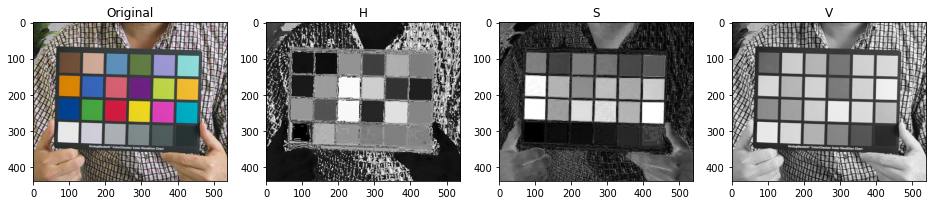

In [69]:
img = cv.imread('resources/Gretag-Macbeth_ColorChecker.jpg')

## TODO
# convert from BGR to HSV
HSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# split h, s, v (색상, 채도, 명도)
h,s,v = cv.split(HSV)
##

# display
plt.subplot(1,4,1), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1,4,2), plt.imshow(h,'gray'), plt.title('H')
plt.subplot(1,4,3), plt.imshow(s,'gray'), plt.title('S')
plt.subplot(1,4,4), plt.imshow(v,'gray'), plt.title('V')
plt.show()


## Color detection

We will create an application which extracts a colored object.
In our application, we will try to extract a blue colored object.

So here is the method:
1. Convert from BGR to HSV color-space
2. We threshold the HSV image for a range of blue color
3. Now extract the blue object alone, we can do whatever on that image we want.

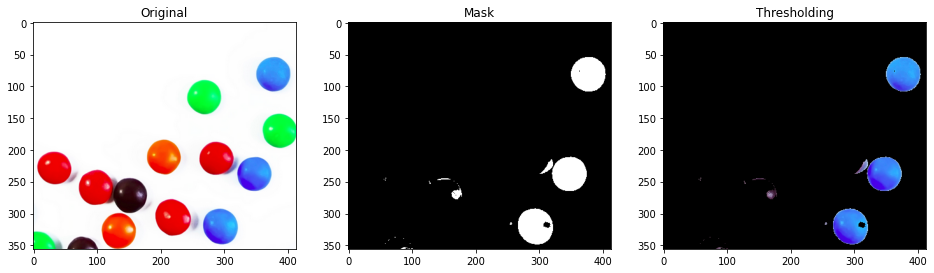

In [94]:
img = cv.imread('resources/smarties.png')
# In OpenCv, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255].


# define range of blue color in HSV
lower_blue = np.array([100,50,50]) #  blue
upper_blue = np.array([160,255,255]) #  blue

## TODO
# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Threshold the HSV image to get mask of region within the blue range (cv.inRange())
mask = cv.inRange(hsv, lower_blue, upper_blue) / 255.

mask = mask[:, :, None] # unsqueezing the last dimension
#mask = np.expand_dims(mask, axis=2) # unsqueezing the last dimension


# apply the mask
res = np.uint8(img * mask)
##

# display
plt.subplot(1,3,1), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(mask,'gray'), plt.title('Mask')
plt.subplot(1,3,3), plt.imshow(cv.cvtColor(res,cv.COLOR_BGR2RGB)), plt.title('Thresholding')
plt.show()

### How to find HSV values from RGB values?

It is very simple and you can use the same function, `cv.cvtColor()`.
Instead of passing an image, you just pass the BGR values you want.
For example, to find the HSV value of Green, try following commands in Python

Now you can take [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound for thresholding.
Apart from this method, you can use any image editing tools or any online converters to find these values, but don’t forget to adjust the HSV ranges.

In [89]:
## TODO
# define 1x1x3 BGR green
# [0, 255, 0]
green = np.uint8([[[0, 255, 0]]])
#print(green.shape) # (1, 1, 3)
# convert BGR green to HSV green
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
##

print(hsv_green) # [[[ 60 255 255]]]


[[[ 60 255 255]]]


### Multiple Colors
Try to find a way to extract more than one colored objects, for example, extract blue, green objects simultaneously.

[[[106 201 246]]]
[[[ 66 255 255]]]


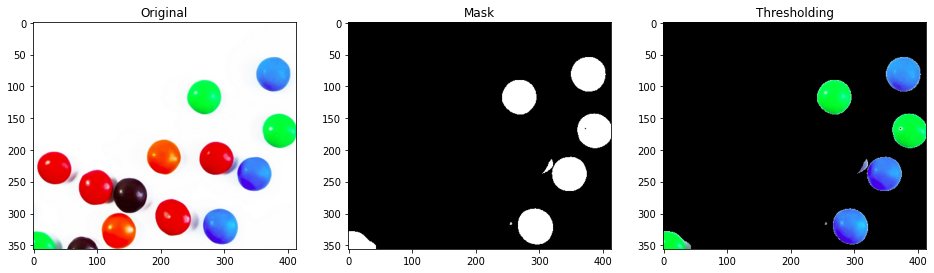

In [100]:
img = cv.imread('resources/smarties.png')

## TODO
# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# find HSV blue
blue = np.uint8([[[246, 144, 52]]])
hsv_blue = cv.cvtColor(blue, cv.COLOR_BGR2HSV)
print(hsv_blue)

# find HSV green
green = np.uint8([[[53, 255, 0]]])
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
print(hsv_green)

# define range of blue color in HSV
lower_blue = np.array([70,50,50]) #  blue
upper_blue = np.array([130,255,255]) #  blue

lower_green = np.array([30,50,50]) # green
upper_green = np.array([90,255,255]) # green

# Threshold the HSV image to get only blue colors (use cv.inRange)
mask_blue = cv.inRange(hsv, lower_blue, upper_blue) == 255 # 255와 같으면 true, 다르면 false
mask_green = cv.inRange(hsv, lower_green, upper_green) == 255

# get binary mask (use np.logical_or)
mask = np.logical_or(mask_blue, mask_green)
# mask = np.clip(mask_blue+mask_green, 0, 1)
mask = np.uint8(mask[:, :, None])

# Bitwise-AND mask and original image
res = img*mask

# display
plt.subplot(1,3,1), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(mask,'gray'), plt.title('Mask')
plt.subplot(1,3,3), plt.imshow(cv.cvtColor(res,cv.COLOR_BGR2RGB)), plt.title('Thresholding')
plt.show()

## Splash of Color

The term splash of color refers to the effect of the use of a colored item on an otherwise monochrome image to draw extra attention to the item.
It has been used frequently in films as a form of emphasis.
Some commercials will film a portion in black and white, except the product which appears in color.

* Methods
1. Convert from BGR to HSV color-space
2. We threshold the HSV image for a range of desired color to get a mask.
3. Set saturation to 0 in pixels outside mask.
4. Convert from HSV to BGR color-space

[[  0   0 255]
 [  0   0 255]
 [  0   0 255]
 ...
 [110   0 255]
 [120   0 254]
 [110   0 255]]


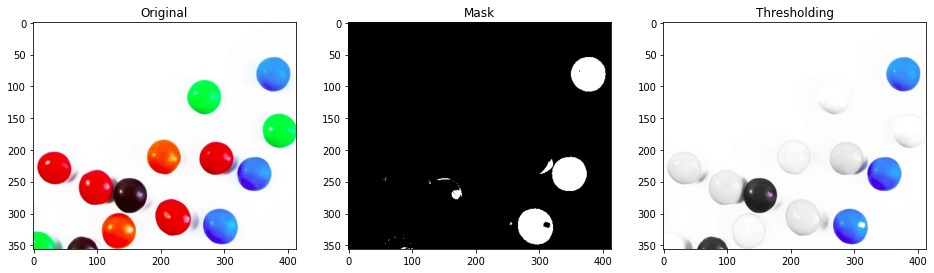

In [65]:
img = cv.imread('resources/smarties.png')

##TODO
# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
# sample blue HSV [141, 224, 142]
lower_blue = np.array([100,50,50]) #  blue
upper_blue = np.array([160,255,255]) #  blue

# Threshold the HSV image to get only blue colors (use cv.inRange())
mask = cv.inRange(hsv, lower_blue, upper_blue) / 255.

# Set saturation to 0 in pixels outside mask.
# (h x w) x c   [c: h, s, v] 1이면 채도(s)를 바꾸는 것, 0이면 색상(hue) 바꾸는 것, 2면 명도(v)를 바꾸는 것
hsv[mask==0, 1] = 0   # mask가 0인 index들의 채도(1)를 0으로 설정
# hsv.shape (356, 413, 3)
print(hsv[mask==0])
# Convert from HSV to BGR color-space
img2 = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)

# display
plt.subplot(1,3,1), plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(mask,'gray'), plt.title('Mask')
plt.subplot(1,3,3), plt.imshow(cv.cvtColor(img2,cv.COLOR_BGR2RGB)), plt.title('Thresholding')
plt.show()